In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer  


# Style
from IPython.display import display

%matplotlib inline


## 1. LOAD DATA AND GENERAL OVERVIEW

In [12]:
# Load data
patients_df = pd.read_csv(r'datasets/Paitients_Files_Train.csv')

# General overview upon the df
print('\n____________ Dataset info ____________')
display(patients_df.info())              
print('\n____________ Statistics of numeric features ____________')
display(patients_df.describe()) 
print('\n____________ Some first data examples ____________')
patients_df.head(5)


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


None


____________ Statistics of numeric features ____________


,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



____________ Some first data examples ____________


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


## 2. EXPLORATORY DATA ANALYSIS (EDA)

### 2.1. EDA Utilities

In [16]:
# Define a function to plot and examine the distribution of numerical attributes
def plot_distribution_box(column, font_scale=3, figsize=(30, 10), tick_label_size=50, color='c'):
    """
    Plot distribution and box using Seaborn. 
    This function is used inside this notebook only and can only be used for patients_df

    Parameters:
    - column: str, name of the column to plot
    - font_scale: float, scale factor for font size
    - figsize: tuple, size of the figure (width, height)
    - tick_label_size: int, size of the tick labels
    - color: diagram color
    
    """
    sns.set(font_scale=font_scale)
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    plt.xticks(fontsize=tick_label_size)
    plt.yticks(fontsize=tick_label_size)
    
    #plot the distribution plot column
    sns.histplot(data=patients_df, x=column, hue='Sepssis', color = color, ax=axes[0], kde=True)
    axes[0].set_title(f'Distribution Plot for {column}')
    axes[0].set_xlabel(f'{column}')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='both', labelsize=12)
    axes[0].axvline(patients_df[column].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth=2)
    axes[0].axvline(patients_df[column].median(), color = 'g', linestyle = '-', label = 'Median', linewidth=2)
    
    #plot the count plot for column
    sns.boxplot(data=patients_df, x='Sepssis', y=column, hue='Sepssis', ax=axes[1])
    axes[1].set_title(f'Box Plot for {column}')
    axes[1].set_xlabel(f'{column}')
    axes[1].tick_params(axis='both', labelsize=12)
    
    plt.show()

In [8]:
# Define a function to plot countplot for attributes
def custom_countplot(column, legend_labels=None, order=None, palette=None, x_ticklabels=None, font_scale=1.2, figsize=(8, 6)):
    """
    Plot a count plot using Seaborn with customized legend labels.

    Parameters:
    - column: str, name of the column to plot
    - legend_labels: dict, custom legend labels (key: original value, value: custom label)
    - order: list, order of values on the x-axis
    - palette: str or list, color palette for the plot
    - x_ticklabels: dict, custom x-axis tick labels (key: original value, value: custom label)
    - font_scale: float, scale factor for font size
    - figsize: tuple, size of the figure (width, height)
    """
    sns.set(font_scale=font_scale)
    plt.figure(figsize=figsize)
    
    # Create a count plot with optional order and palette
    plot = sns.countplot(patients_df, x=column, hue='Sepssis', order=order, palette=palette)
    
    # Customize legend labels
    if legend_labels:
        handles, _ = plt.gca().get_legend_handles_labels()
        labels = [legend_labels.get(label, label) for label in plt.gca().get_xticks()]
        plt.legend(handles, labels, title=column, loc='upper right', bbox_to_anchor=(1, 0.9))
    
    # Customize x-axis tick labels
    if x_ticklabels:
        tick_positions = plt.xticks()[0]
        new_ticklabels = [x_ticklabels.get(int(label), label) for label in tick_positions]
        plot.set_xticklabels(new_ticklabels)
        
        
    # Customize labels and title
    plt.title(f'Count Plot for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.show()

### 2.2. Analysis of quantitive variables considering Sepssis status 

#### 2.2.1. Plasma Glucose (PRG)

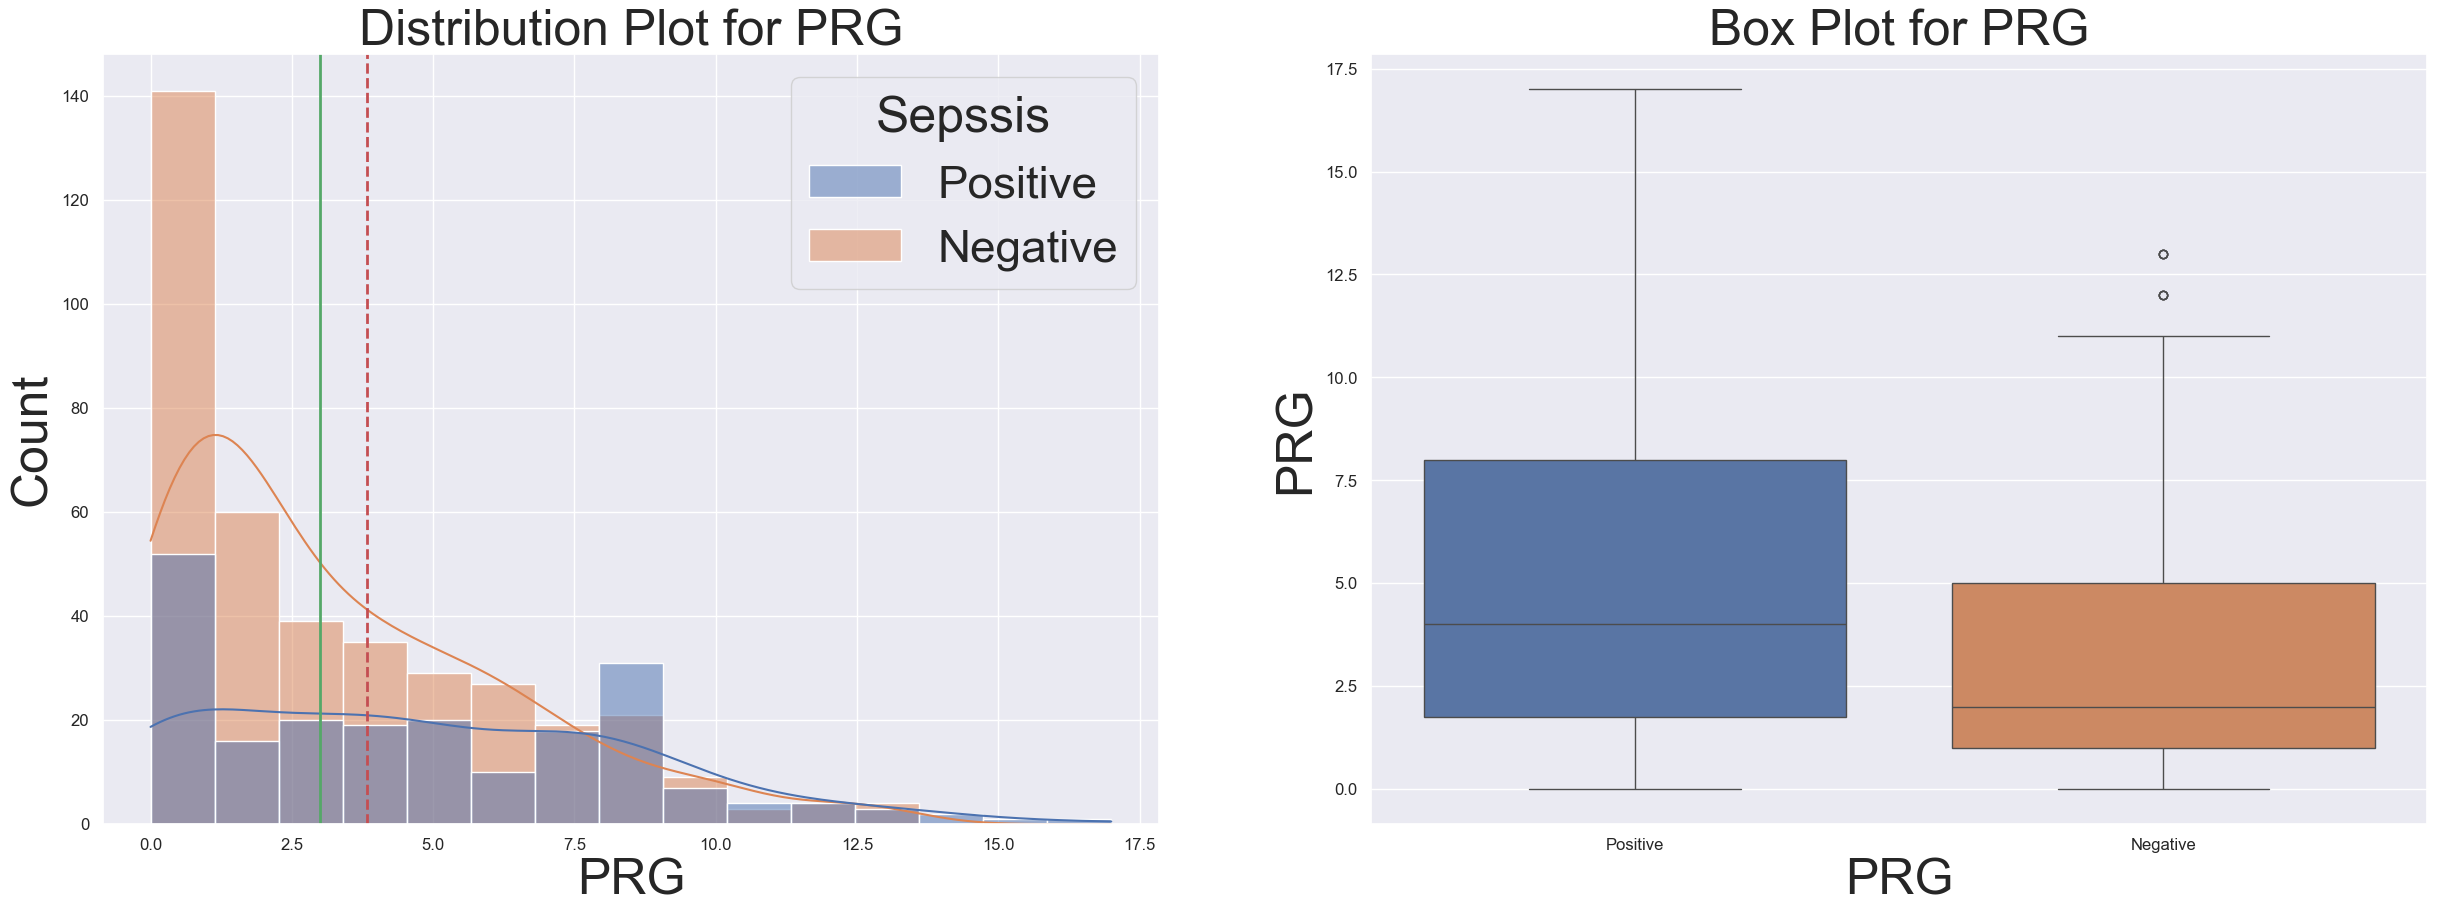

In [11]:
#plot distribution diagram and box plot for 'PRG'
plot_distribution_box('PRG')

#### 2.2.2. Blood Work Result-1 (PL)

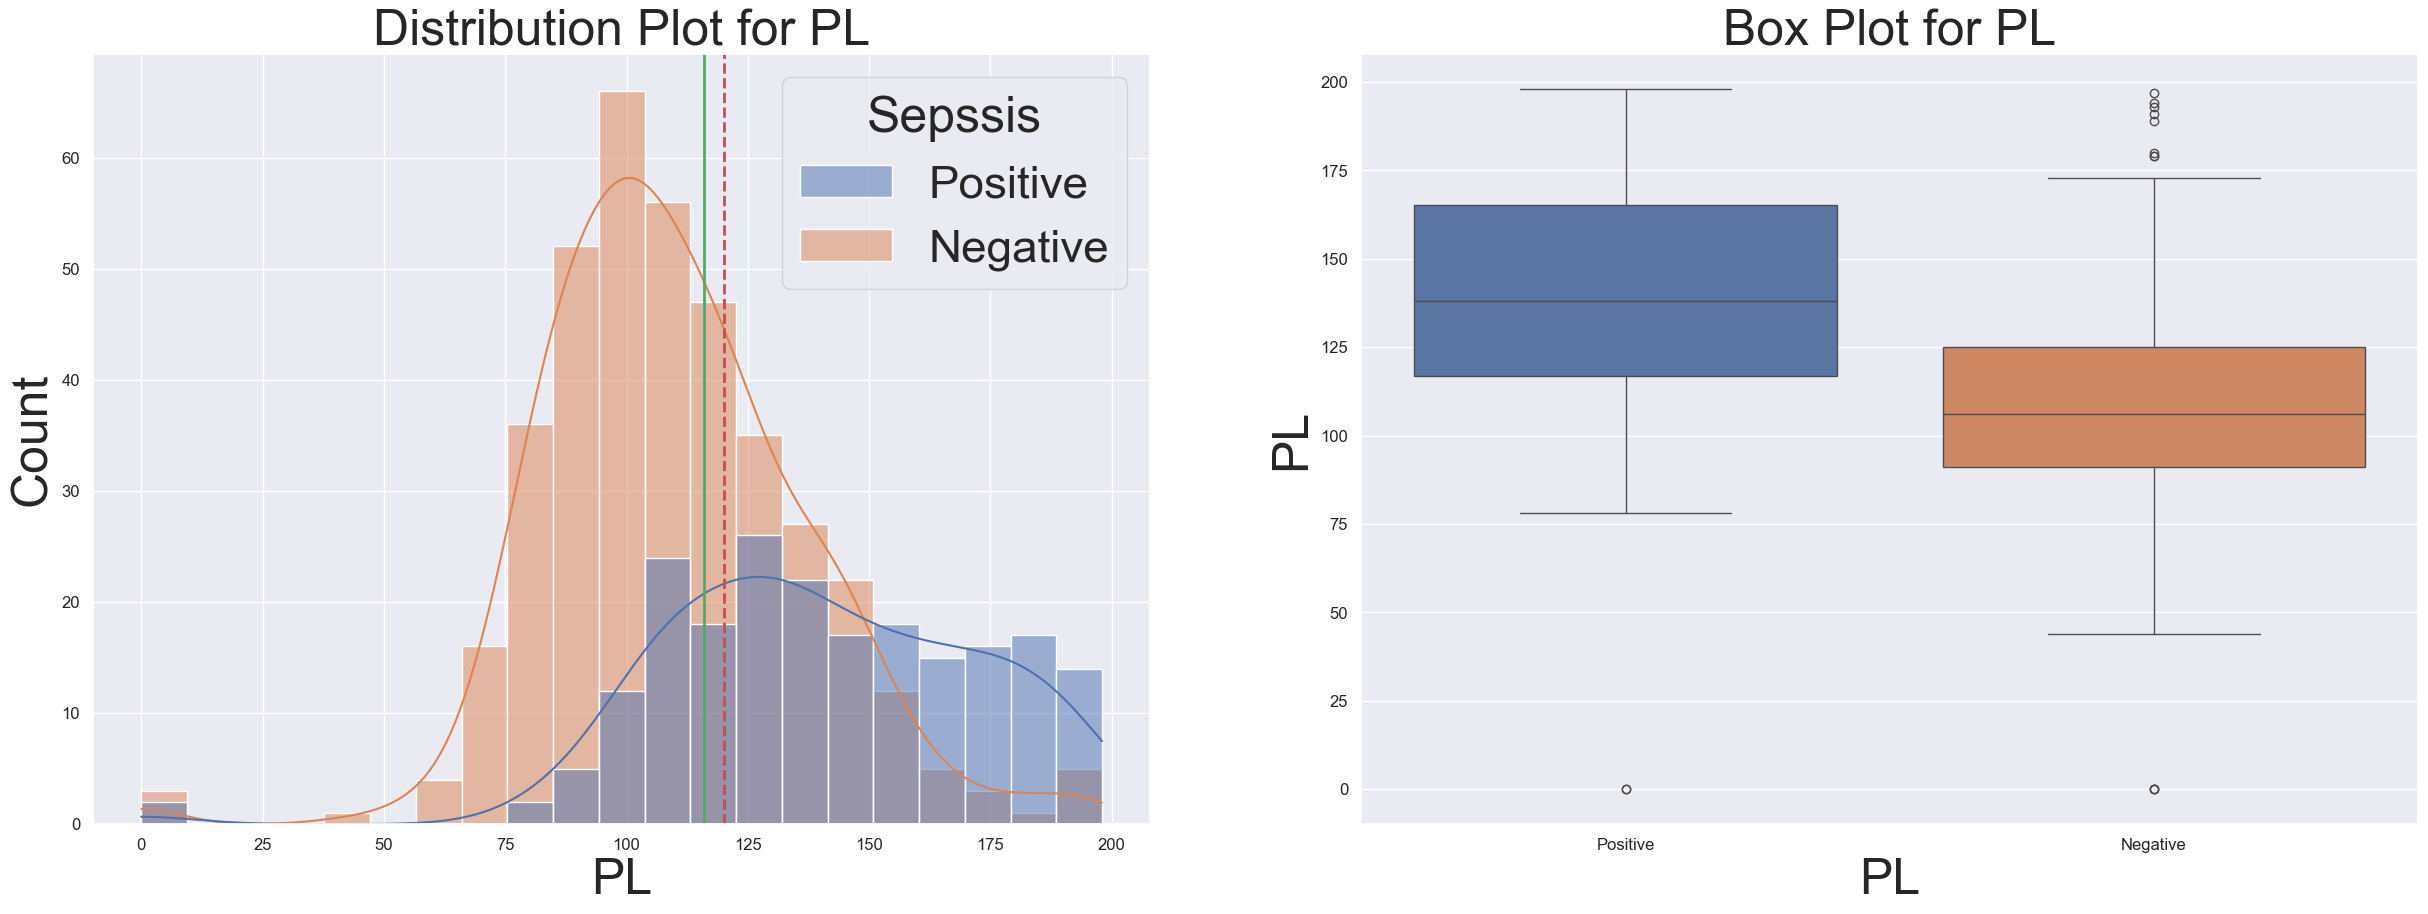

In [13]:
#plot distribution diagram and box plot for 'PL'
plot_distribution_box('PL')

#### 2.2.3. Blood Pressure (PR)

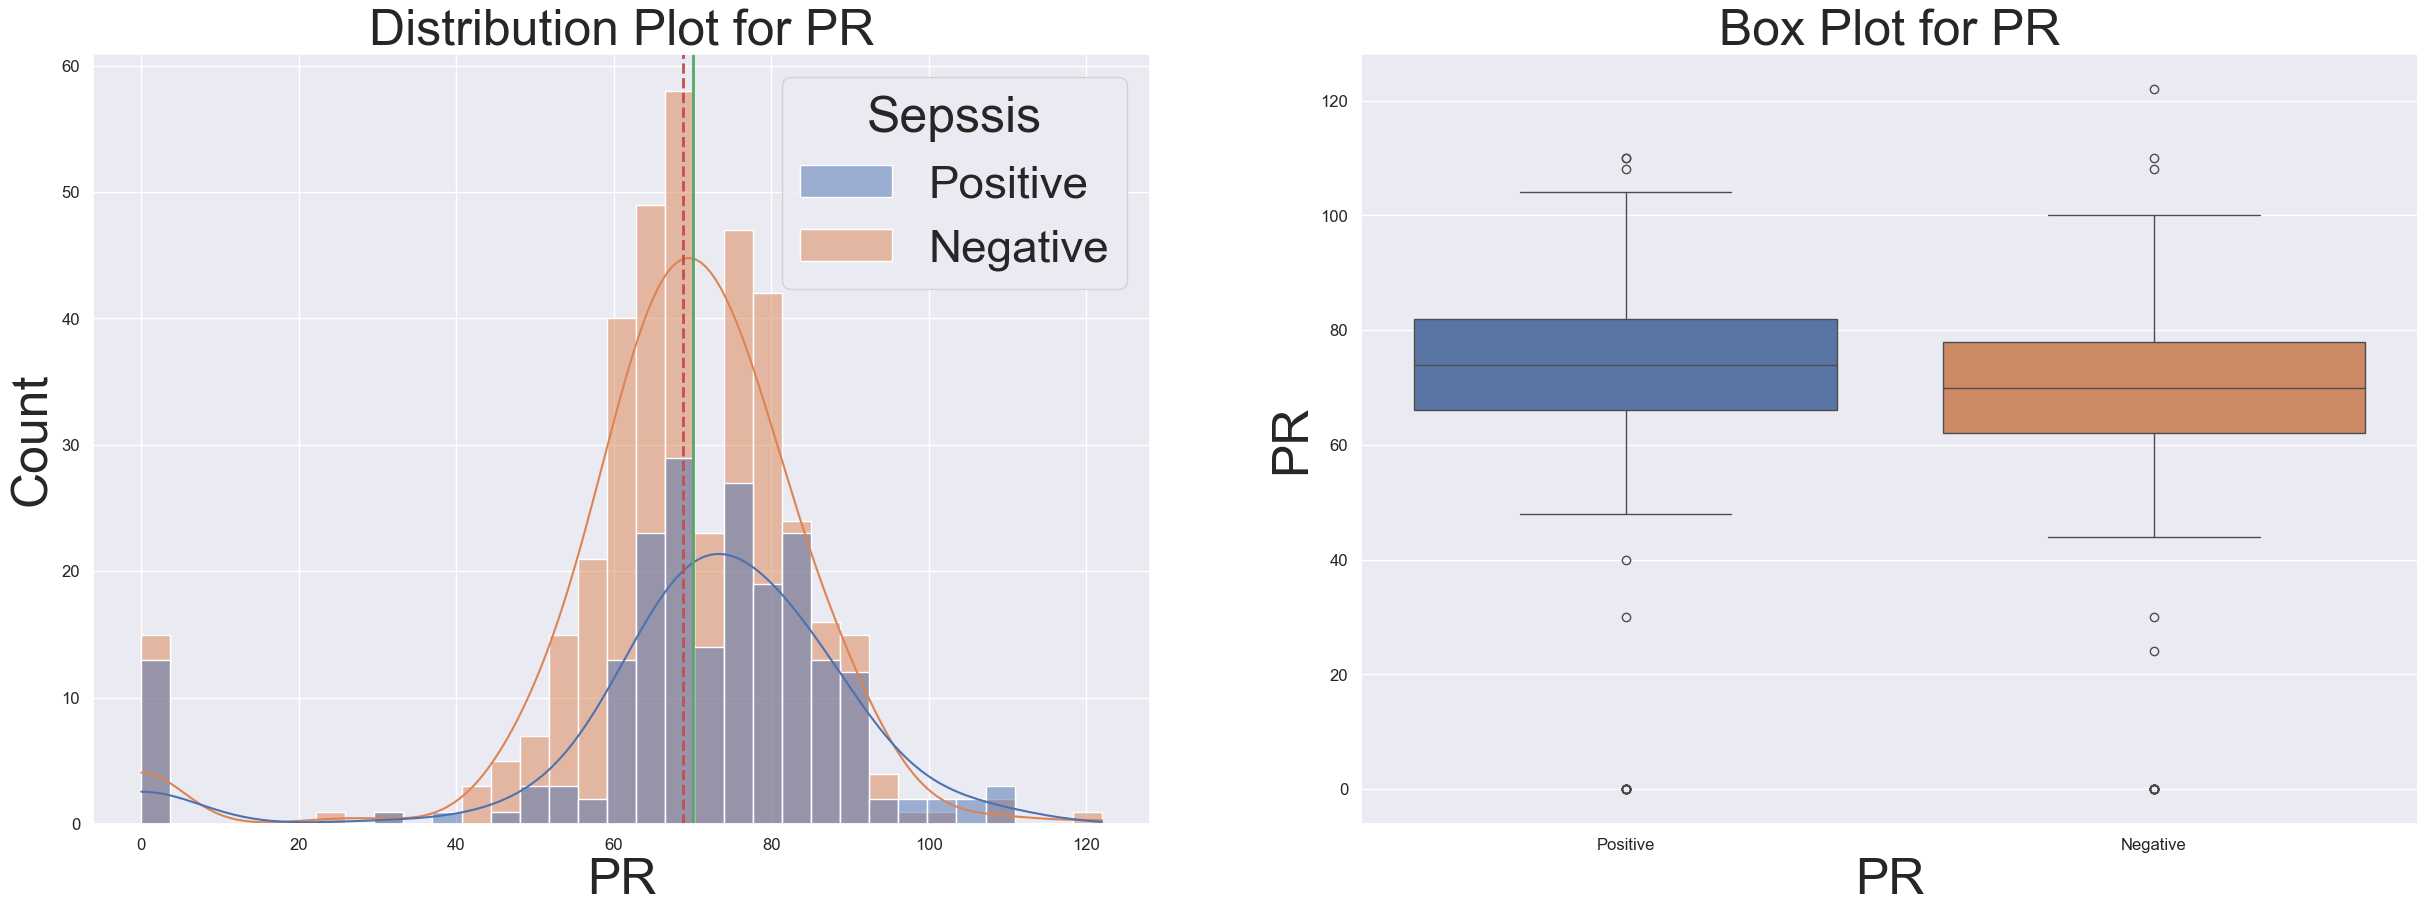

In [15]:
#plot distribution diagram and box plot for 'PR'
plot_distribution_box('PR')

#### 2.2.4. Blood Work Result-2 (SK)

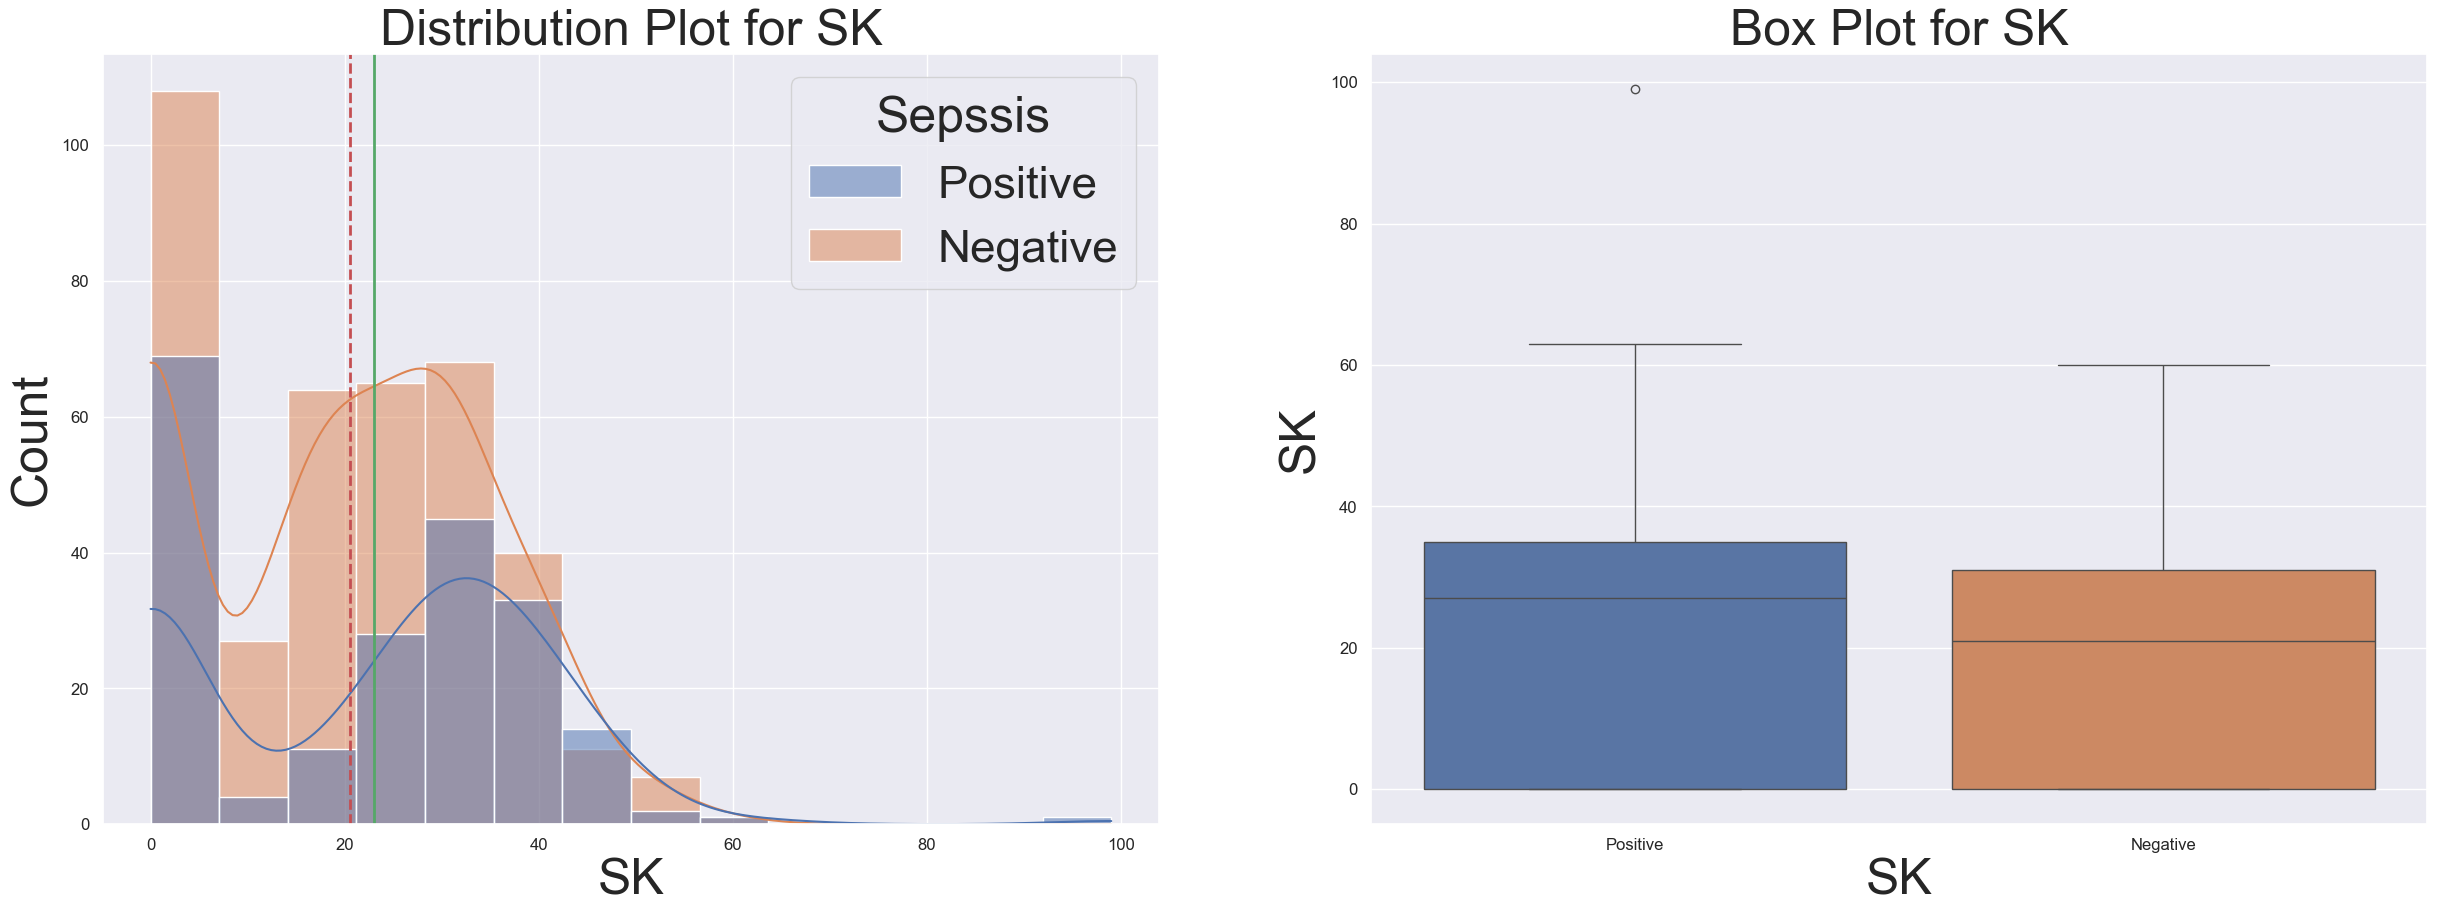

In [17]:
#plot distribution diagram and box plot for 'SK'
plot_distribution_box('SK')

#### 2.2.5. Blood Work Result-3 (TS)

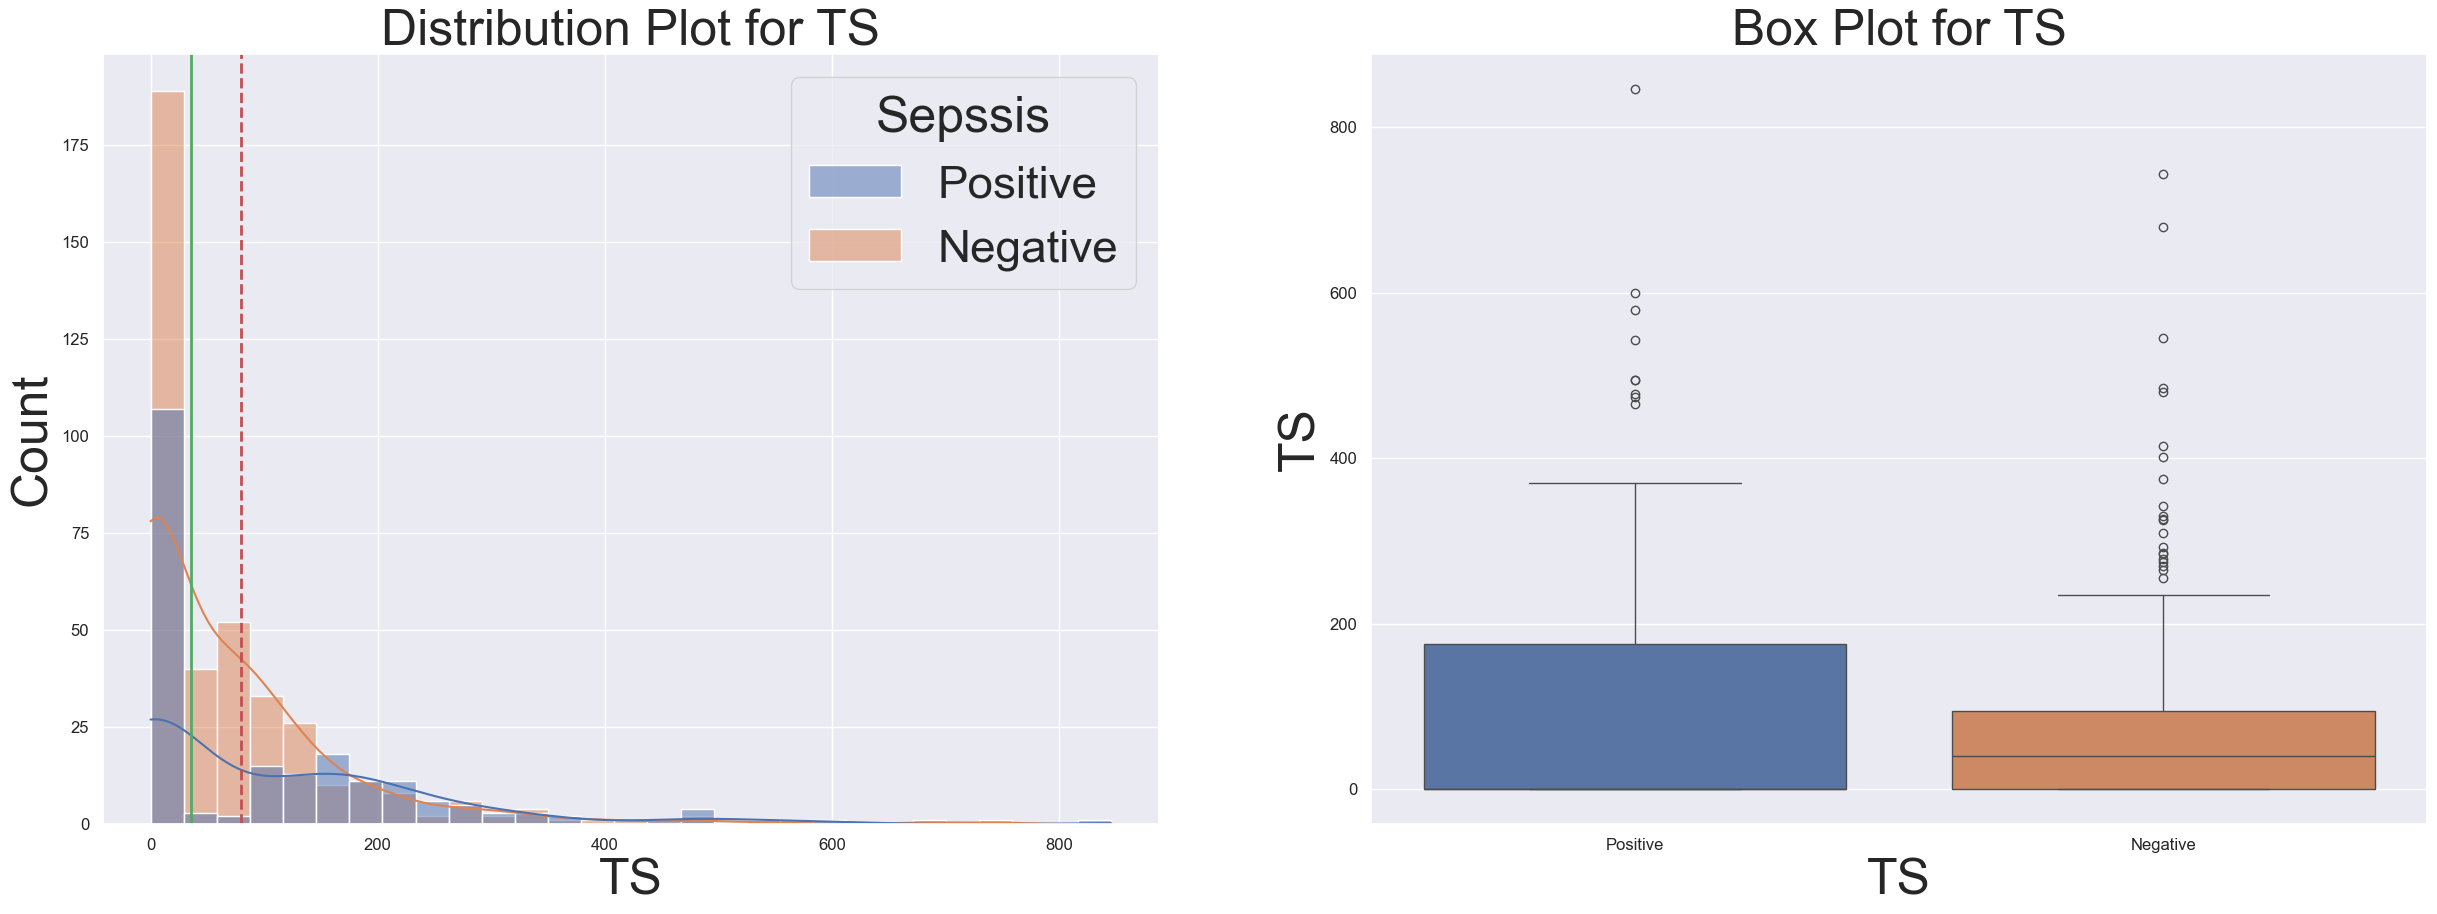

In [19]:
#plot distribution diagram and box plot for 'TS'
plot_distribution_box('TS')

#### 2.2.6. Body mass index (M11)

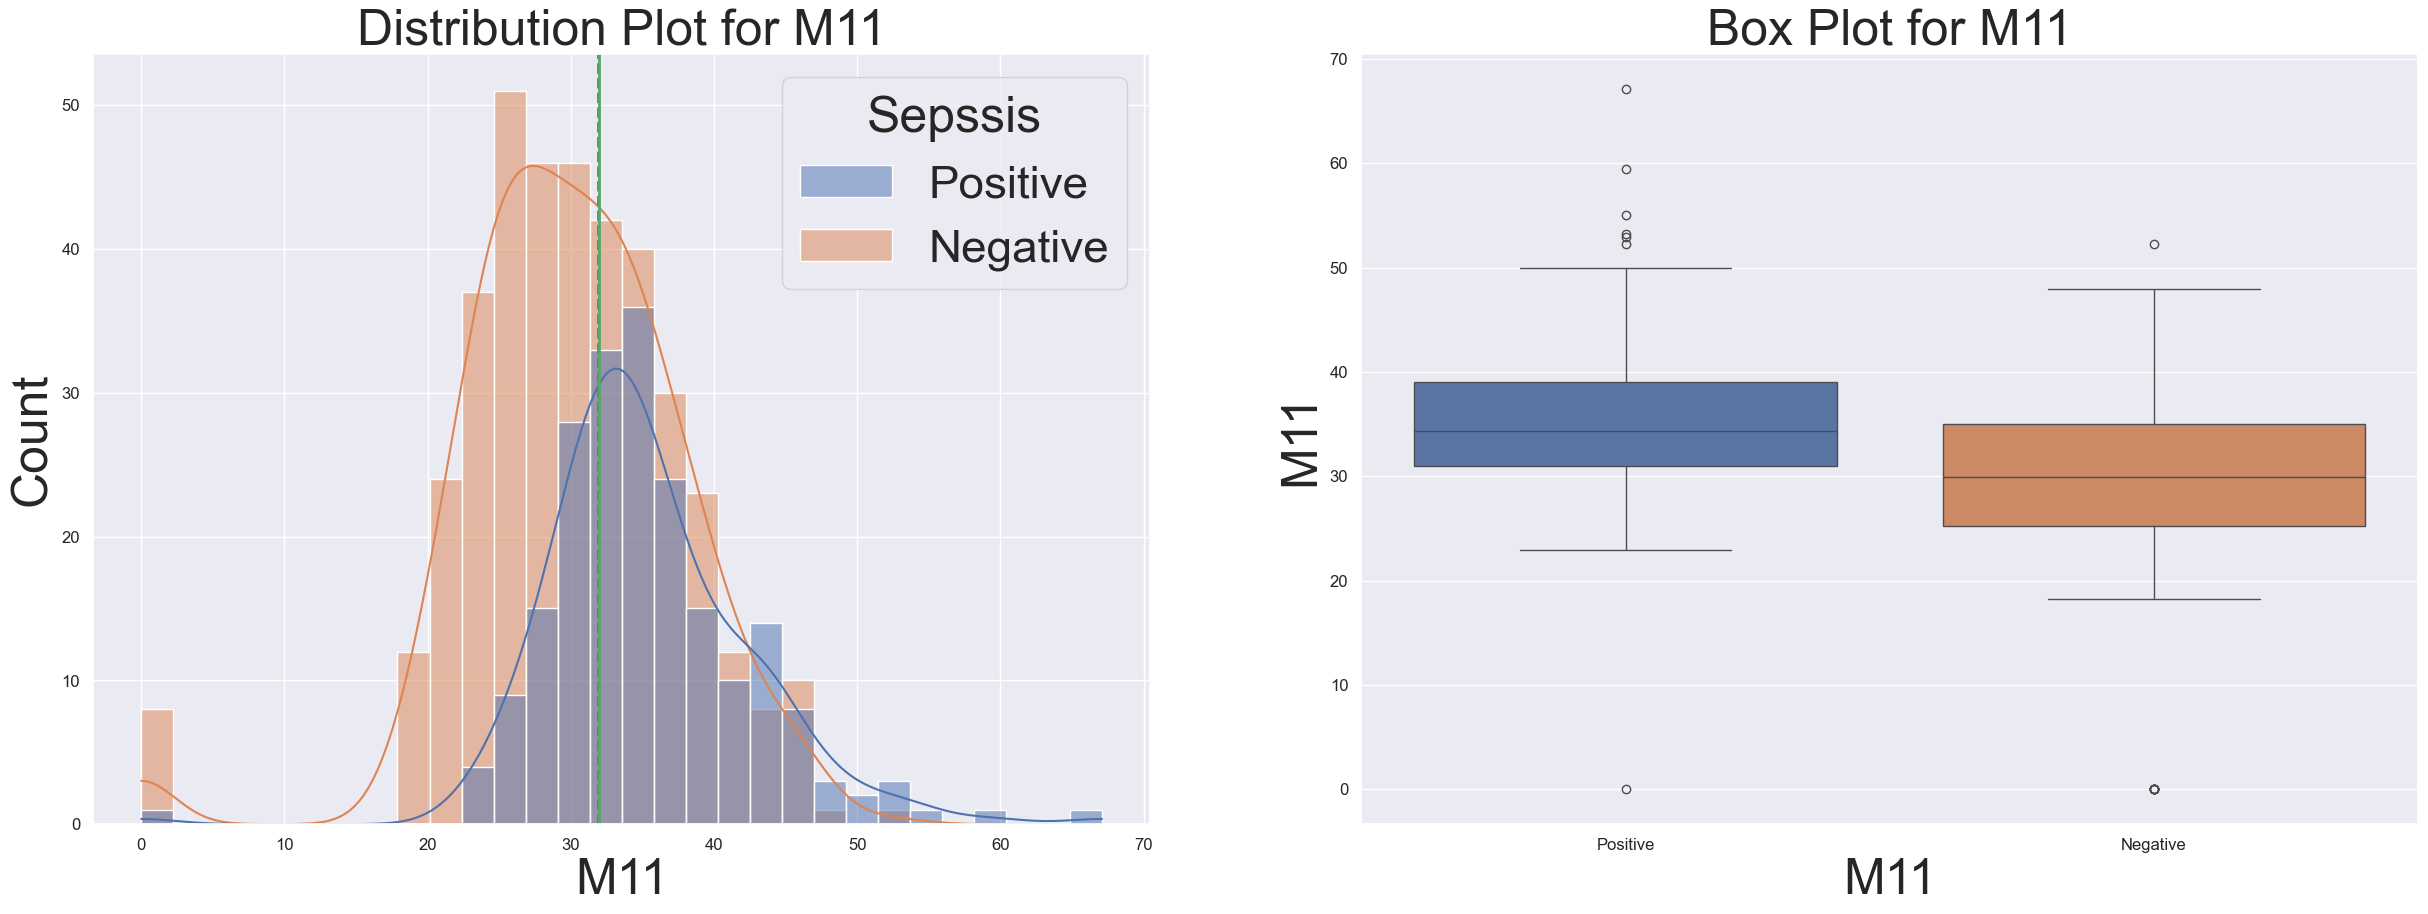

In [18]:
#plot distribution diagram and box plot for 'M11'
plot_distribution_box('M11')

https://www.betterhealth.vic.gov.au/health/healthyliving/body-mass-index-bmi

body mass can not be 0

#### 2.2.7. Blood Work Result-4 (BD2)

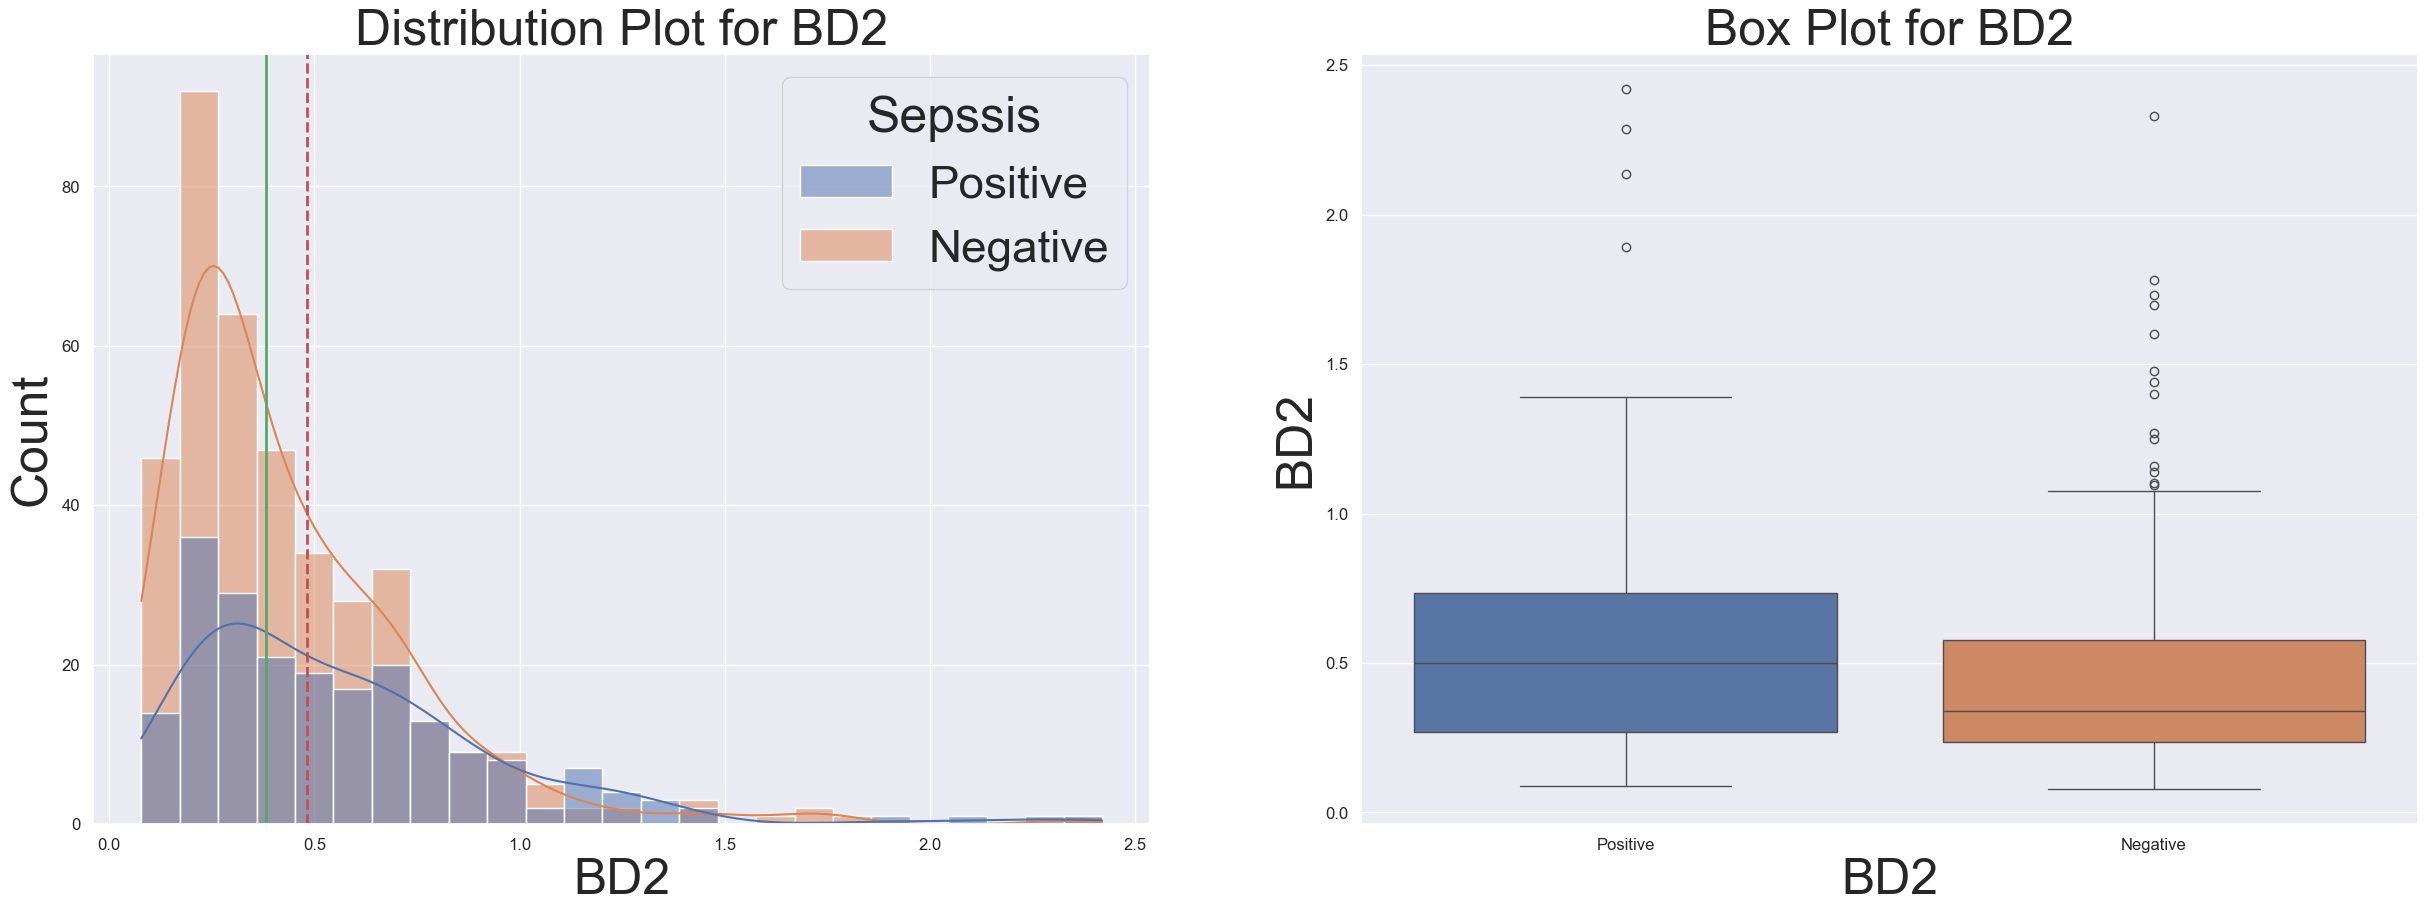

In [23]:
#plot distribution diagram and box plot for 'BD2'
plot_distribution_box('BD2')

#### 2.2.8. Age

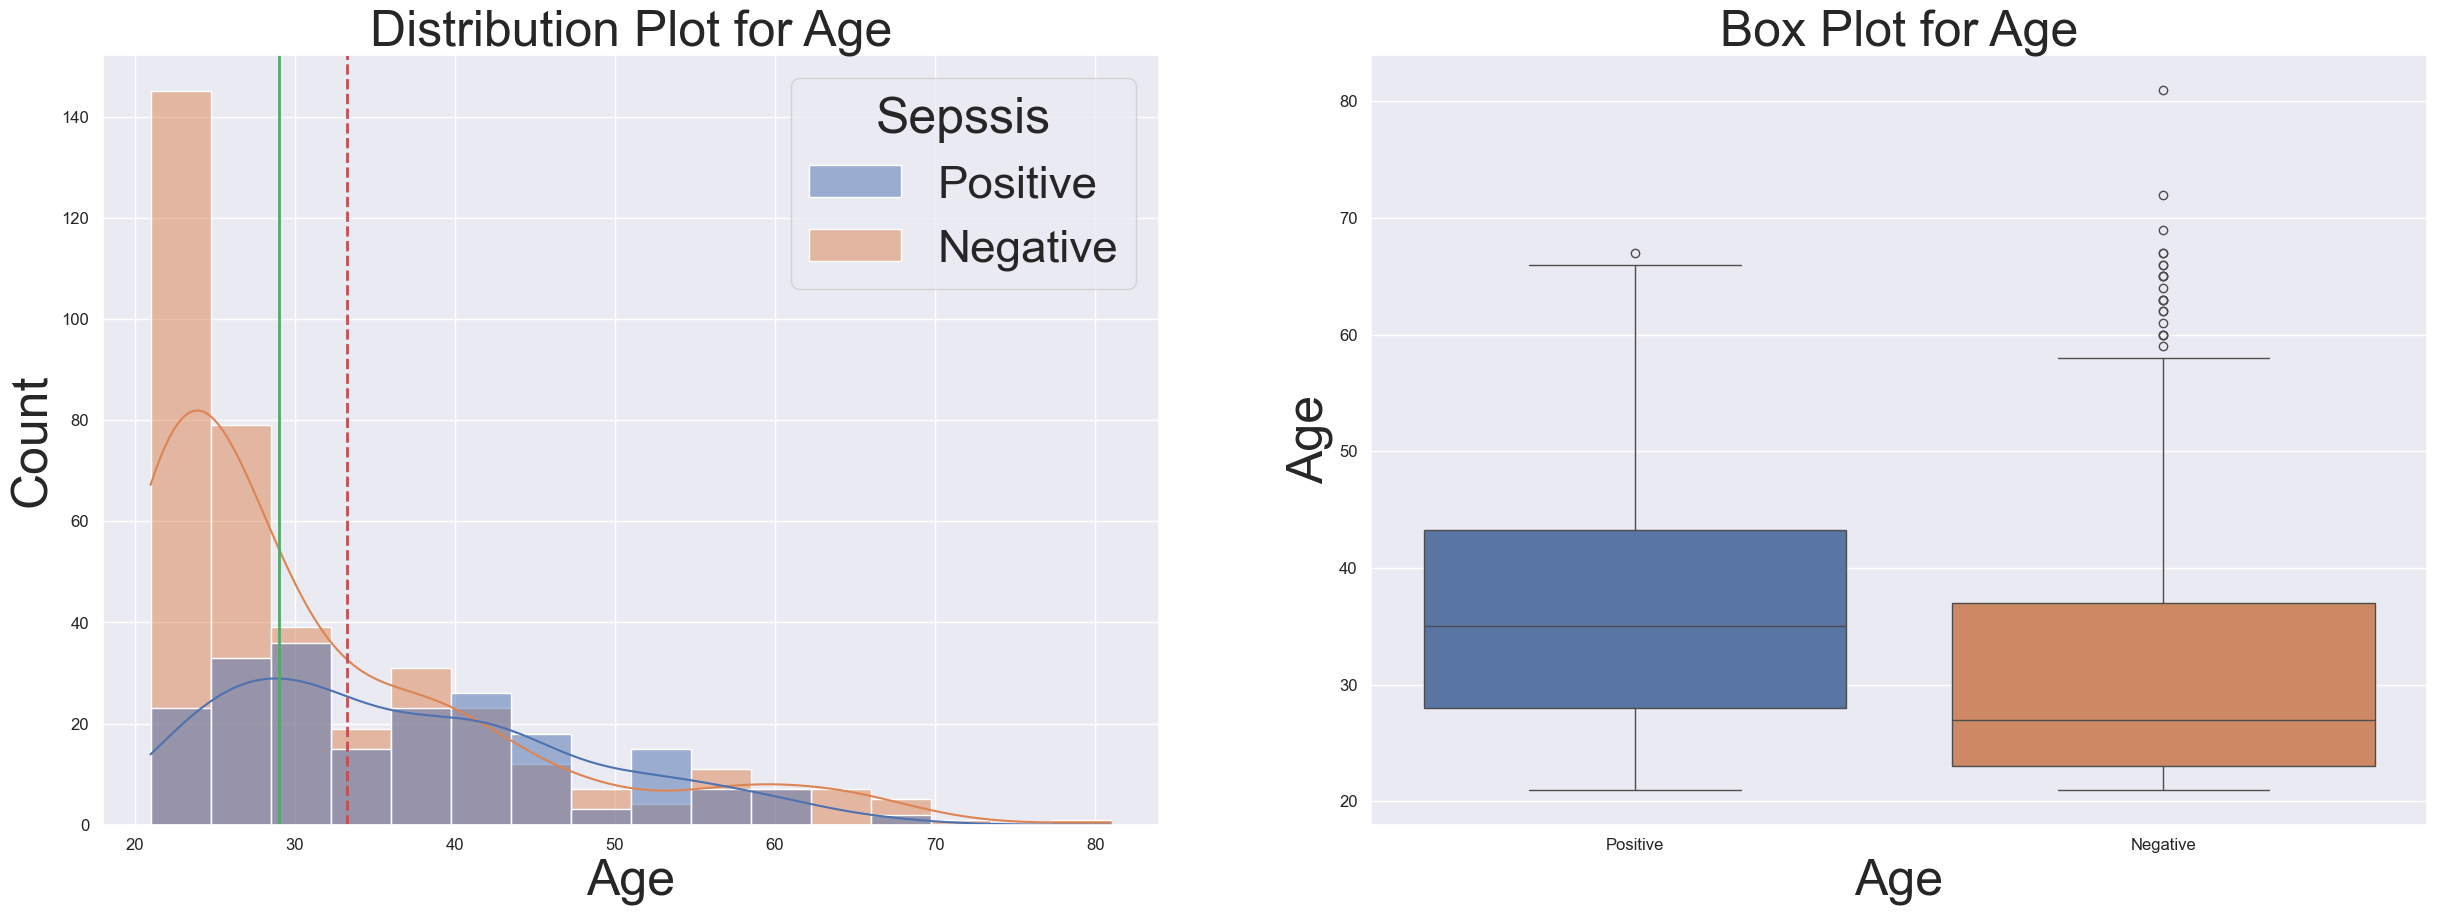

In [25]:
#plot distribution diagram and box plot for 'Age'
plot_distribution_box('Age')

### 2.3. Analysis of categorical variables

#### 2.3.1 Insurance

/var/folders/vm/z9qxr6cj32d1snjyp290wj1h0000gp/T/ipykernel_44274/1654238953.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(new_ticklabels)


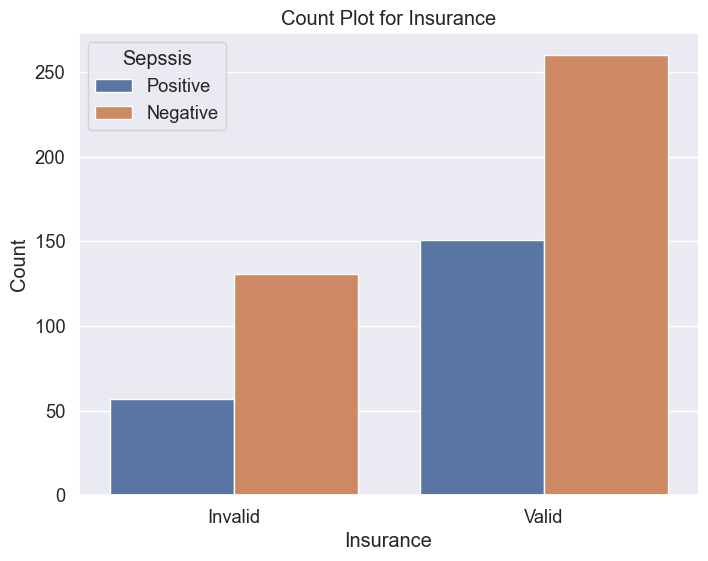

In [28]:
# Plot count plot for 'Insurance'
insurance_labels={0: 'Invalid', 1: 'Valid'}
custom_countplot('Insurance', x_ticklabels=insurance_labels)

### 2.4. Analysis of Sepssis

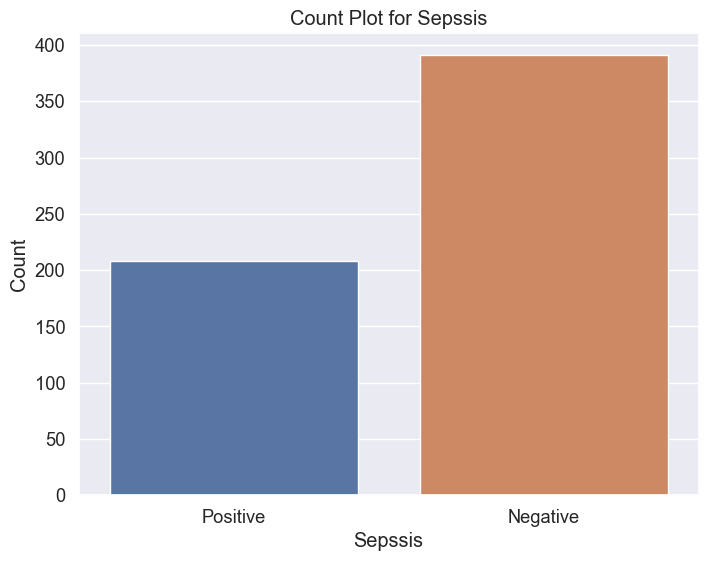

In [30]:
# Plot count plot for 'Sepssis'
custom_countplot('Sepssis')

### 2.5. Variables Correlation

In [32]:
seps={'Negative':0, 'Positive': 1}
patients_df['Sepssis'] = patients_df['Sepssis'].map(seps)
patients_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,1
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,0
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,1


In [33]:
patients_df = patients_df.drop(columns=['ID'])

Text(0.5, 1.0, 'Correlation Matrix of Data')

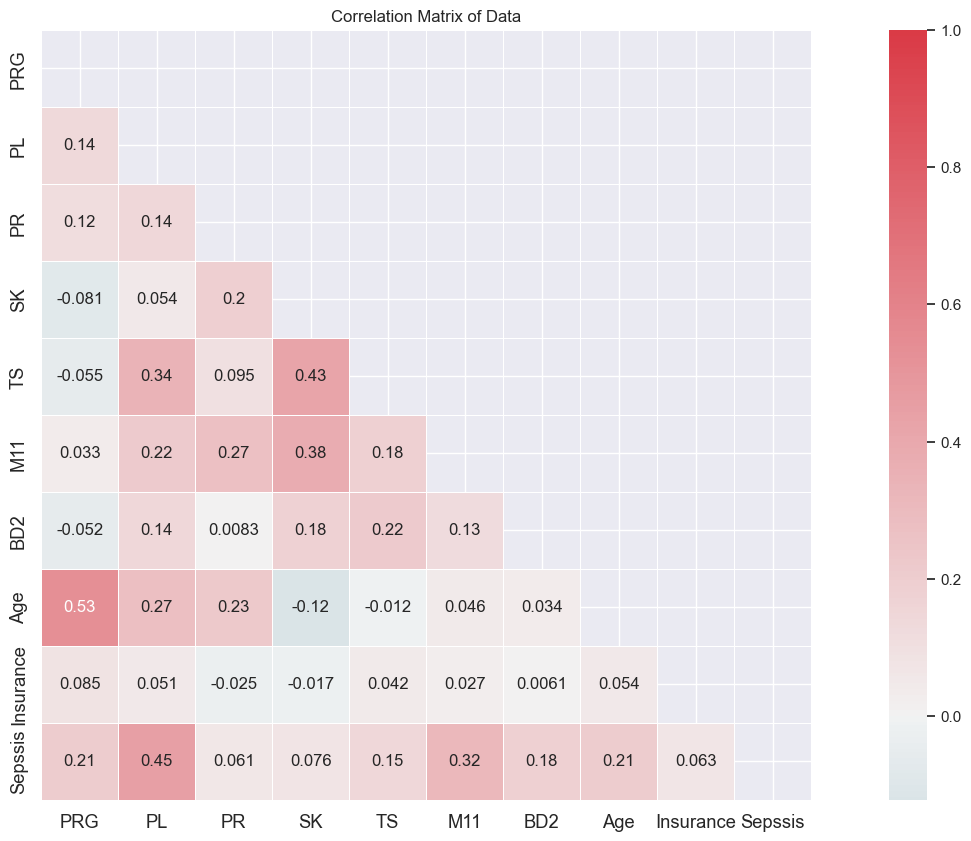

In [34]:
corr = patients_df.corr()

# mask for better visualization
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (20, 10))

# color
cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.set(font_scale=1)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": 1}, annot = True)

ax.set_title('Correlation Matrix of Data')

## 3. DATA PROCESSING
- **Drop unused features**

In [37]:
patients_df.drop(columns = ["PR", "SK", "Insurance"], inplace=True) 

### 3.1. Split train-test set

In [39]:
train_set, test_set = train_test_split(patients_df, test_size=0.2, random_state=42, stratify=patients_df['Sepssis'])
print('\n____________ Split training and test set ____________')     
print(len(train_set), "training +", len(test_set), "test examples")
print(train_set.head(4))


____________ Split training and test set ____________
479 training + 120 test examples
     PRG   PL   TS   M11    BD2  Age  Sepssis
161    7  102  105  37.2  0.204   45        0
236    7  181  192  35.9  0.586   51        1
497    2   81   76  30.1  0.547   25        0
40     3  180   70  34.0  0.271   26        0


In [41]:
train_set_labels = train_set["Sepssis"].copy()
train_set = train_set.drop(columns = "Sepssis") 
test_set_labels = test_set["Sepssis"].copy()
test_set = test_set.drop(columns = "Sepssis") 

### 3.2. Data Processing


#### 3.2.1. Original Pipeline

need to handle outliers in prior to scaling

use minmax scaler (normalization) as many features are skewed


In [37]:
# transformer that handles outliers of 'PL' and 'M11'
# PL is integer => take median
# M11 mean = median
outliers_transformer = ColumnTransformer(transformers=[
        ("outliers_handlers", SimpleImputer(missing_values=0, strategy="median", copy=True)), ['PL, M11']])

# preprocessor pipeline
preprocessor_pipeline = Pipeline([
    ('outliers_handlers', outliers_transformer),
    ('scaler', MinMaxScaler(copy=True))
])

#### 3.2.2. Polynomial Pipeline (Feature Engineering)

In [42]:
# polynomial preprocessor pipeline
polynomial_preprocessor_pipeline = Pipeline([
    ('outliers_handlers', outliers_transformer),
    ('scaler', MinMaxScaler(copy=True)),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False))
])

## 4. TRAINING MODELS

### 4.1. Models training utilities

In [ ]:
def Generate_Model_Test_Classification_Report(model, X_test, y_test, smote, preprocessor_pipeline, model_name=""):

    '''
    Purpose: 
        Generate the consolidated test classification report. 
        The report consists of the following classification results & metrics -
            1. Confusion Matrix
            2. Classification Report
            3. F1 Score
            4. Accuracy
            5. Mathews Correlation Coefficient (MCC)
            6. Precision
            7. Recall
            8. AUROC Score - Area Under the Receiver Operating Characteristic Curve
            9. AUC-PR Score - Area Under the Precision Recall Curve.
            10. AUROC Curve - Area Under the Receiver Operating Characteristic Curve
            11. AUC-PR Curve - Area Under the Precision Recall Curve.

    Parameters:
        1. y_test - The Ground Truth for each test image.
        2. y_pred - The Predicted label for each image.
        3. model_name - Model Name

    Return Value: 
        NONE.
    '''

    # Report Title & Classification Mterics Abbreviations...
    fig, axes = plt.subplots(3, 1, figsize = (8, 3))
    axes[0].text(9, 1.8, "CONSOLIDATED MODEL TEST REPORT", fontsize=30, horizontalalignment='center', 
                 color='DarkBlue', weight = 'bold')

    axes[0].axis([0, 10, 0, 10])
    axes[0].axis('off')

    axes[1].text(9, 4, "Model Name: " + model_name, style='italic', 
                         fontsize=18, horizontalalignment='center', color='DarkOrange', weight = 'bold')

    axes[1].axis([0, 10, 0, 10])
    axes[1].axis('off')

    axes[2].text(0, 4, "* 1 - Not Survived\t\t\t\t\t\t\t * 0 - Survived\n".expandtabs() +
                 "* MCC - Matthews Correlation Coefficient\t\t* AUC - Area Under The Curve\n".expandtabs() +
                 "* ROC - Receiver Operating Characteristics     " + 
                 "\t* AUROC - Area Under the Receiver Operating    Characteristics".expandtabs(), 
                 style='italic', fontsize=10, horizontalalignment='left', color='orangered')

    axes[2].axis([0, 10, 0, 10])
    axes[2].axis('off')

    scores = []
    metrics = ['F1       ', 'MCC      ', 'Precision', 'Recall   ', 'Accuracy ',
               'AUC_ROC  ', 'AUC_PR   ']

    # Plot ROC and PR curves using all models and test data...
    y_pred = model.predict(X_test.values)
    y_pred_probs = model.predict_proba(X_test.values)[:, 1:]

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred)
    precision, recall, th = precision_recall_curve(y_test.values.ravel(), y_pred_probs)

    # Calculate the individual classification metic scores...
    model_f1_score = f1_score(y_test, y_pred)
    model_matthews_corrcoef_score = matthews_corrcoef(y_test, y_pred)
    model_precision_score = precision_score(y_test, y_pred)
    model_recall_score = recall_score(y_test, y_pred)
    model_accuracy_score = accuracy_score(y_test, y_pred)
    model_auc_roc = auc(fpr, tpr)
    model_auc_pr = auc(recall, precision)

    scores.append([model_f1_score,
                   model_matthews_corrcoef_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   model_auc_pr])

    sampling_results = pd.DataFrame(columns = ['Classification Metric', 'Score Value'])
    for i in range(len(scores[0])):
        sampling_results.loc[i] = [metrics[i], scores[0][i]]

    sampling_results.index = np.arange(1, len(sampling_results) + 1)

    class_report = classification_report(y_test, y_pred)
    conf_matx = confusion_matrix(y_test, y_pred)

    # Display the Confusion Matrix...
    fig, axes = plt.subplots(1, 3, figsize = (20, 4))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes[0])
    axes[0].set_title("1. Confusion Matrix", fontsize=21, color='darkgreen', weight = 'bold', 
                      style='italic', loc='left', y=0.80)

    # Classification Metrics
    axes[1].text(5, 1.8, sampling_results.to_string(float_format='{:,.4f}'.format, index=False), style='italic', 
                 fontsize=20, horizontalalignment='center')
    axes[1].axis([0, 10, 0, 10])
    axes[1].axis('off')
    axes[1].set_title("2. Classification Metrics", fontsize=20, color='darkgreen', weight = 'bold', 
                      style='italic', loc='center', y=0.80)

    # Classification Report
    axes[2].text(0, 1, class_report, style='italic', fontsize=20)
    axes[2].axis([0, 10, 0, 10])
    axes[2].axis('off')
    axes[2].set_title("3. Classification Report", fontsize=20, color='darkgreen', weight = 'bold', 
                      style='italic', loc='center', y=0.80)

    plt.tight_layout()
    plt.show()

    # AUC-ROC & Precision-Recall Curve
    fig, axes = plt.subplots(1, 2, figsize = (14, 4))

    axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(recall, precision, label = f"auc_pr = {model_auc_pr:.3f}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("4. AUC - ROC Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold', 
                      style='italic', loc='center', pad=1, y=1.05)

    axes[1].legend(loc = "lower left")
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title("5. Precision - Recall Curve", fontsize=15, color='darkgreen', ha='right', weight = 'bold', 
                      style='italic', loc='center', pad=3, y=1.05)

    plt.subplots_adjust(top=0.95) 
    plt.tight_layout()
    plt.show()
    

# Define a function to plot model feature importances
def plot_model_feature_importances(model):
    '''
    Custom function to plot the 
    feature importances of the classifier.
    '''
    fig = plt.figure()
    
    # get the feature importance of the classifier 'model'
    feature_importances = pd.Series(model.feature_importances_,
                            index = X_train.columns) \
                    .sort_values(ascending=False)
    
    # plot the bar chart
    sns.barplot(x = feature_importances, y = X_train.columns)
    plt.title('Classifier Feature Importance', fontdict = {'fontsize' : 20})
    plt.xticks(rotation = 60)
    plt.show()

### 4.2. Model 1: Logistic Regression

### 4.3. Model 2: K-Nearest Neighbor 

### 4.4. Model 3: Random Forest

### 4.5. Evaluation